_Import the `pandas`, `numpy`, `train_test_split`, `accuracy_score`, `KNeighborsClassifier`, and `pyplot`._

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Problem:

Download the `wine` dataset. It contains information about a number of wines -- their characteristics (features) and if it's considered high quality or not (1 or 0). First, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality (last column). Report these features.

Then, use 70% data for training to build a kNN classifier with different values of k ranging from 2 to 10. Plot your accuracies with each of these. In other words, your final result will be a line chart with k on the x-axis and accuracy on the y-axis.

_First we need to load in the `wine` dataset:_

In [23]:
df_wine = pd.read_csv('wine.csv')

_Prior to building our models, we can change `color` (indicating whether a wine was `red` or `white`) from a string categorical type to a number categorical type. We can assign them as follows:_

> _white : 0_

> _red : 1_

In [24]:
df_wine["color"] = np.where(df_wine["color"] ==  "red", 1, 0)

_To figure out a good subset of features to use for learning whether a wine is of high quality, I created simple logistic models for each of the attributes and measured their average accuracy. They all had an average accuracy of predicting `high_quality` of about 0.8 but with `quality` having an average accuracy of 1.0. The `quality` feature producing a perfect accuracy makes sense since `high_quality` is determined by applying a threshold to `quality`. So while a simple logictic model with simply `quality` being used as the only feature would produce perfect accuracy, it is trivial and not very insightful. Hence, we can instead choose a subset of features that do not include `quality`, such as `fixed_acidity`, `volatile_acidity`, and `citric_acid`._

_So, we can assign these three as the features to use in our model and `high_quality` as the label._

In [25]:
features4 = df_wine.drop("high_quality", axis = 1).drop("residual_sugar", axis = 1).drop("chlorides", axis = 1).drop("free_sulfur_dioxide", axis = 1).drop("total_sulfur_dioxide", axis = 1).drop("density", axis = 1).drop("pH", axis = 1).drop("sulphates", axis = 1).drop("alcohol", axis = 1).drop("quality", axis = 1).drop("color", axis = 1).drop("is_red", axis = 1)
label2 = df_wine["high_quality"]

_Next we can split the data into 70% training and 30% testing. Note that `X` represents the features and `y` represents the label._

In [26]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(features4, label2, test_size = 0.30)

_Now we can build a kNN classifier with different values of `k` ranging from 2 to 10 and later graph the accuracies for each value of `k`. So, first we should create a list to keep track of the values of `k` and another list to track the accuracies at each value of `k`._

In [27]:
k_val = list(range(2,11))
accuracies = list(range(2,11))

> _Note: __[this](https://stackoverflow.com/questions/10712002/create-an-empty-list-in-python-with-certain-size)__ source was used to understand the `range()` function._

Then we can run through each value of `k` from 2 to 10 and track the accuracies for each of these k-values.

In [28]:
i = 0
for k in range(2,11):
    k_val[i] = k
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train4, y_train4)
    pred_knn = knn.predict(X_test4)
    accuracies[i] = accuracy_score(y_test4, pred_knn)
    i = i + 1

_Next we can combine these values of `k` and their corresponding accuracies into a dataframe that can be used to visually plot the results._

In [29]:
data = {'k_val' : k_val, 'accuracies' : accuracies}
df_accuracies = pd.DataFrame(data)
df_accuracies

,k_val,accuracies
0,2,0.807692
1,3,0.772821
2,4,0.790256
3,5,0.782051
4,6,0.804615
5,7,0.789231
6,8,0.809744
7,9,0.801026
8,10,0.808718


_Now we can plot this dataframe to see how the accuracy of our kNN classifier model varies as `k` ranges from 2 to 10._

Text(0.5, 1.0, 'kNN Classifier Model Accuracies')

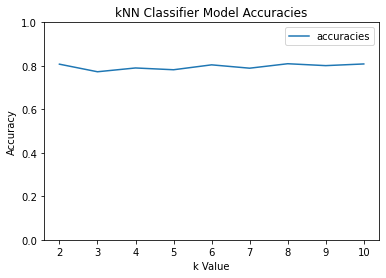

In [30]:
df_accuracies.plot(x = "k_val", y = "accuracies", kind = "line")
plt.ylim([0, 1])
plt.xlabel("k Value")
plt.ylabel("Accuracy")
plt.title("kNN Classifier Model Accuracies")

> _Note: __[this](https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/)__ source was used to determine how to change the axis boundaries._